# Data Analysis

## Spark + MongoDB

In [1]:
from pyspark.sql import SparkSession
from operator import add
import matplotlib as mpl
import matplotlib.pyplot as plt

In [7]:
def sort_1(e):
    return e[0]

def sort_2(e):
    return e[1]
#"spark://localhost:7077"
spark = SparkSession.builder\
    .appName("spark_test_pandas")\
    .master("local") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:10.1.1")\
    .config("spark.mongodb.read.connection.uri", "mongodb://192.168.2.6:27117/MSS.songs")\
    .getOrCreate()
spark_context = spark.sparkContext

NameError: name 'SparkSession' is not defined

In [12]:
sdf = spark\
.read.format("mongodb")\
.option("uri", "mongodb://192.168.2.6:27117/MSS.songs").load()

In [13]:
sdf.show()

+--------------------+--------------------+----------------+-----------------+-------------------+-------------------+--------------------+---------------+--------------------+----------------+--------------------+--------------------+---------------+--------------------+------------+---------+--------------+------+-----+-----------------+----------------+-------------------+--------------+--------------------+---------------+-----------------------+------------------+-----------------------+-------------------------+------------------------------+---------------------------+--------------------+------------------+-------------------+-------------------+---------------------+----------------+---+--------------+--------+----+---------------+--------------------+------------------+-------------------+--------------------+-----------------+-------+--------------+-------------------------+--------------------+----------------+--------------------+----+
|                 _id|analysis_sample

### plot songs per year

Text(0, 0.5, 'Nr of songs')

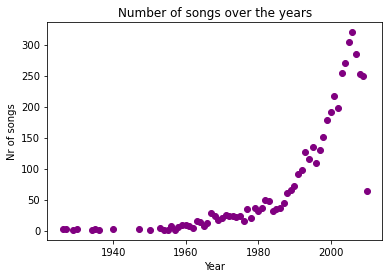

In [5]:
year_freq = sdf.select('Year').rdd\
                .map(lambda x: (x, 1))\
                .reduceByKey(add).collect()
years = [float(i[0][0]) if float(i[0][0])>0 else None for i in year_freq]
years_freq_ =[i[1] for i in year_freq]

plt.plot(years, years_freq_,'o', color='purple')
plt.title('Number of songs over the years')
plt.xlabel('Year')
plt.ylabel('Nr of songs')

### plot song per year with condition

Text(0, 0.5, 'Nr of songs')

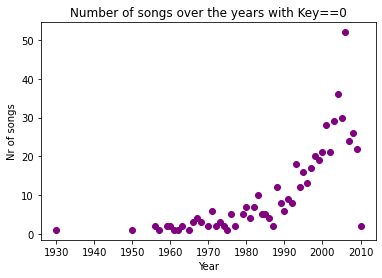

In [7]:
condition = 'Key==0'
year_freq = sdf.where(condition).select('Year').rdd\
                .map(lambda x: (x, 1))\
                .reduceByKey(add).collect()#, key=sort_1, reverse=False)
years = [float(i[0][0]) if float(i[0][0])>0 else None for i in year_freq]
years_freq_ =[i[1] for i in year_freq]

plt.plot(years, years_freq_,'o', color='purple')
plt.title('Number of songs over the years with {}'.format(condition))
plt.xlabel('Year')
plt.ylabel('Nr of songs')

In [17]:
spark.stop()

## perform tests


In [1]:
def data_anal(spark):
    pass

In [15]:
import time

master = "local"   # "spark://192.168.144.2:7077"

num_cores = [i for i in range(1, 4)]
time_dct = {}
col = ['tstart', 'tsession_created', 'tdata_loaded', 'tdata_analysed']

for ncs in num_cores:
    time_lst = []
    time_lst.append(time.time()) # tstart
    spark = SparkSession.builder\
                        .appName("analysis_test_0_cores_{}".format(ncs))\
                        .master(master) \
                        .config("spark.cores.max", ncs)\
                        .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:10.1.1")\
                        .config("spark.mongodb.read.connection.uri", "mongodb://192.168.2.6:27117/MSS.songs")\
                        .getOrCreate()
    time_lst.append(time.time()) # tsession_created
    sdf = spark\
                        .read.format("mongodb")\
                        .option("uri", "mongodb://192.168.2.6:27117/MSS.songs").load()
    time_lst.append(time.time()) # tdata_loaded
    
    # data analysis
    data_anal(spark)
    
    time_lst.append(time.time()) # tdata_analysed
    
    spark.stop()
    time_dct[str(ncs)] = time_lst

print(col)
print(time_dct)
    

In [16]:
spark.stop()